<a href="https://colab.research.google.com/github/junkuna/Machine-Learning-Training/blob/main/Decision_Tree_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
(5197, 3) (1300, 3)
0.7808350971714451
0.7776923076923077
It shows low score, underfitting
We will use Decision Tree to divide the data with high accuracy
0.996921300750433
0.8546153846153847
It is overfitting


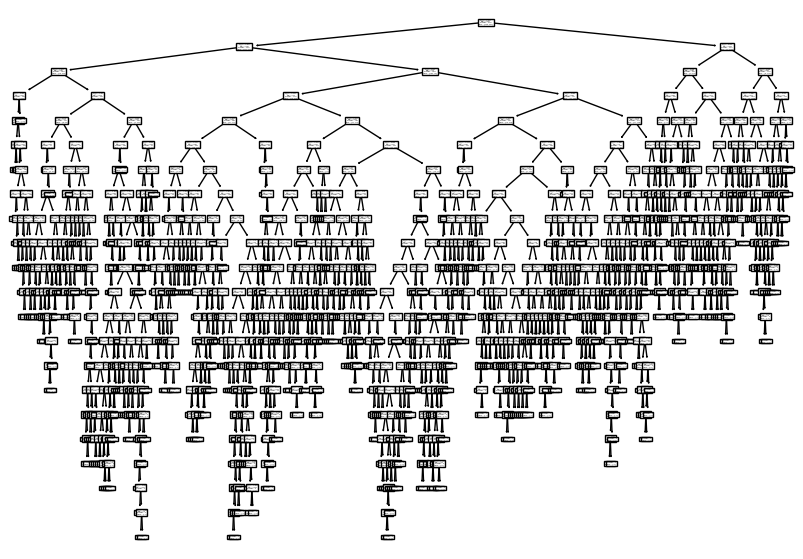

0.8454877814123533
0.8415384615384616


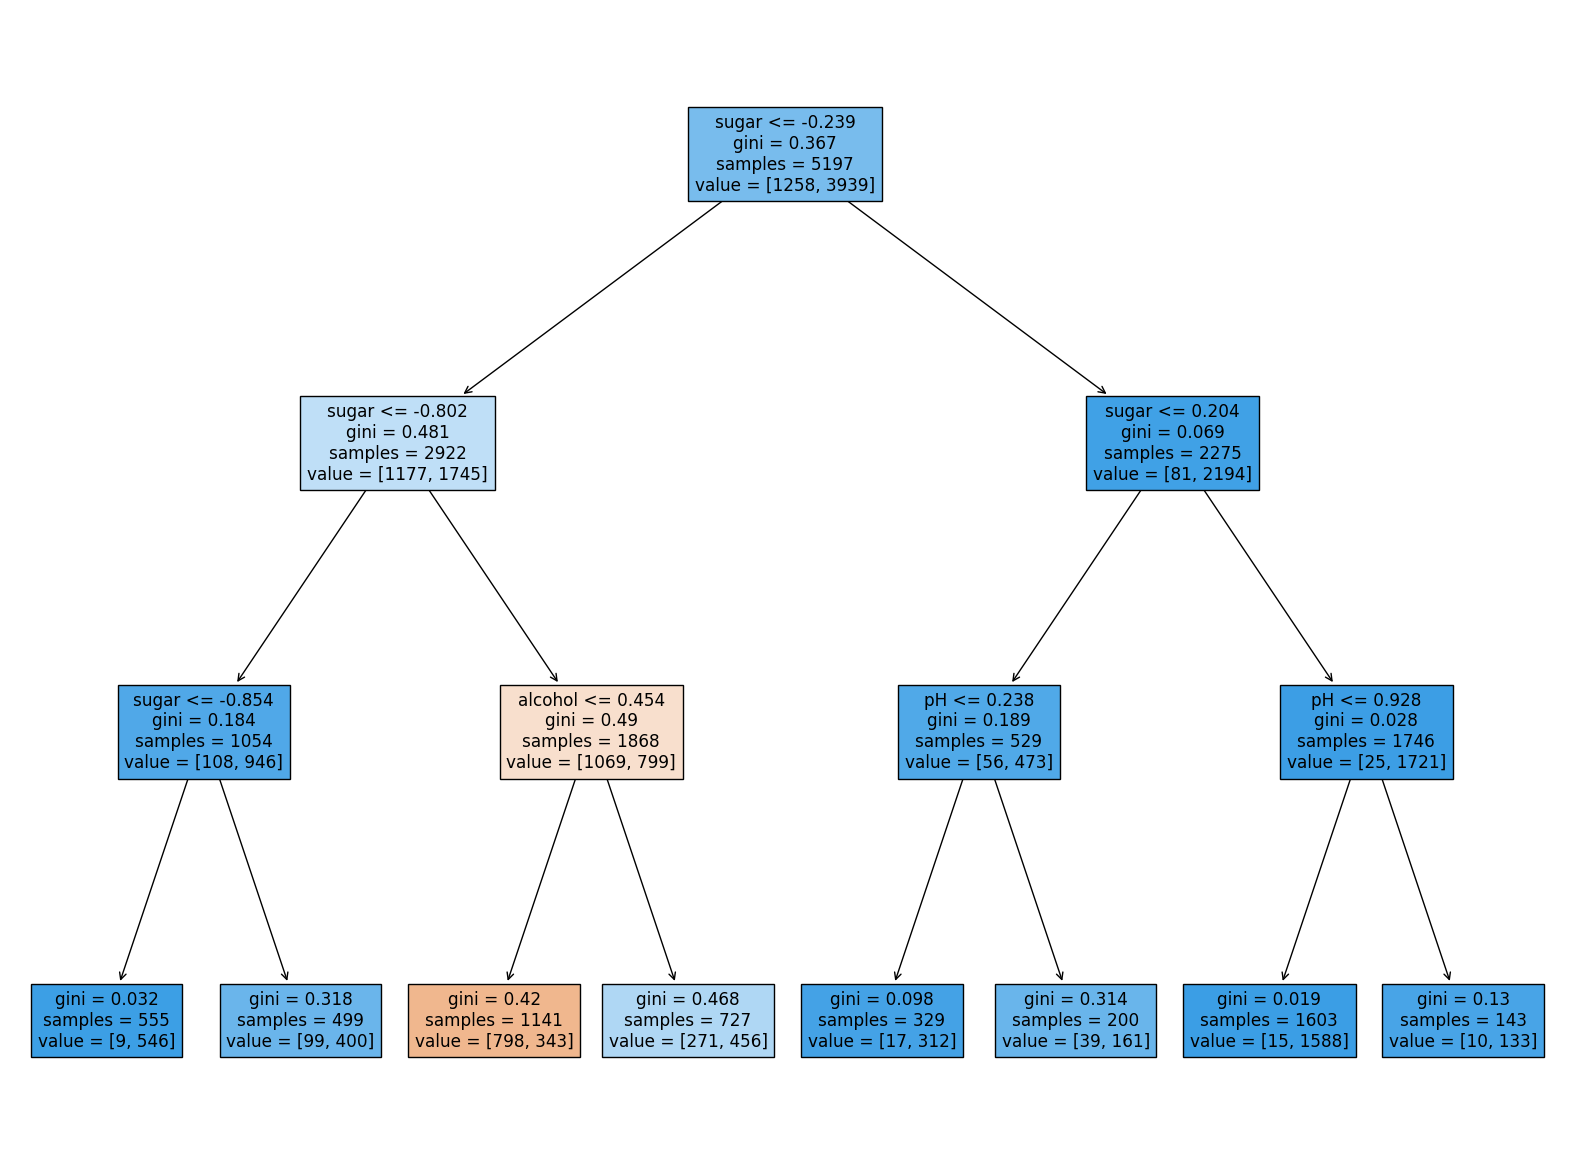

[0.12345626 0.86862934 0.0079144 ]
sugar was the importance of feature to distinct white and red wines


In [ ]:
import pandas as pd
wine = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/wine.csv')

## understanding the information of wines
wine.head()

wine.info()

wine.describe()

## scale is different in each category. We need to standardize
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

## split train and test sets
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)
print(train_input.shape, test_input.shape)

## standardize the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## let's try logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
print('It shows low score, underfitting')

## Defining easier answer by Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)
print('We will use Decision Tree to divide the data with high accuracy')
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

print('It is overfitting')

## show the graph to understand the situation
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()


### let's see more of tree graph
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

## check which feature is the most important for identification
print(dt.feature_importances_)
print('sugar was the importance of feature to distinct white and red wines')

